# swmm_api basic tutorial

In this Jupyter Notebook, our goal is to explore basic functionalities of `swmm_api`. You can find the documentation [here](https://markuspichler.gitlab.io/swmm_api/README.html#).

For our analyses, we will use Example2-Post.inp, that we worked on in class. Verify your code by comparing to the .inp file

In [1]:
#!pipinstall swmm-api[full]

# Test installation

In [2]:
import swmm_api
print(f'{swmm_api.__version__ = }')

swmm_api.__version__ = '0.4.64'


### Import packages

In [3]:
from swmm_api.input_file import read_inp_file #, SwmmInput, section_labels as sections
#from swmm_api.input_file.sections import Outfall

In [4]:
# read the file 
# the inp object is like a dictionary

inp = read_inp_file('Example2-Post.inp') 

### Make a map plot

In [5]:
from swmm_api import SwmmInput
from swmm_api.input_file.macros import nodes_dict, PlottingMap, init_empty_map_plot, plot_longitudinal
from swmm_api.input_file.macros import add_node_map, add_link_map, add_subcatchment_map, add_node_labels, plot_map

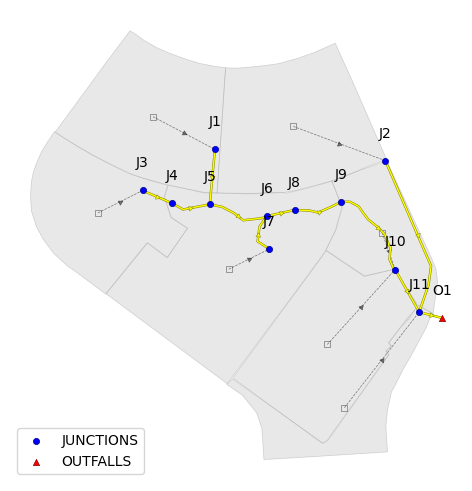

In [6]:
# make it prettier

m = PlottingMap(inp).add_subcatchment_map(add_connector_arrows=True).add_link_map(add_arrows=True).add_node_map().add_node_labels(y_offset=80)
# fig, ax = m.fig, m.ax

### Run a simulation and extract results

In [7]:
from swmm_api import SwmmInput, SwmmOutput, SwmmReport
from swmm_api.run_swmm import swmm5_run_epa, swmm5_run_progress
from swmm_api.run_swmm.run_temporary import swmm5_run_temporary

In [8]:
# run simulation

with swmm5_run_temporary(inp.copy(), run = swmm5_run_progress, label='example_run_swmm') as res:
    out = res.out  # type: SwmmOutput
    rpt = res.rpt  # type: SwmmReport

swmm5 C:\Users\ps28866\AppData\Local\Temp\tmpi_c92cva\example_run_swmm.inp:   0%|          | 0/100 [00:00<?, ?…

In [9]:
from swmm_api.output_file import OBJECTS, VARIABLES

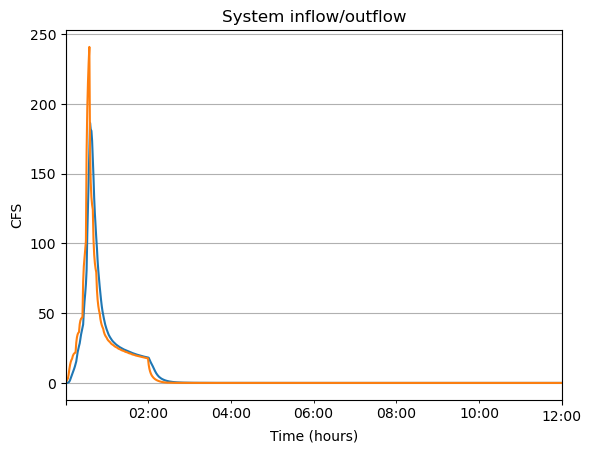

In [10]:
# plot system outflow
# total inflow at O1
import matplotlib.pyplot as plt

out.get_part(OBJECTS.NODE, 'O1', VARIABLES.NODE.TOTAL_INFLOW).plot()
out.get_part(OBJECTS.SYSTEM, None, VARIABLES.SYSTEM.RUNOFF).plot()
plt.xlabel('Time (hours)')
plt.ylabel('CFS')
plt.title('System inflow/outflow')
plt.grid(True)